In [ ]:
import pandas as pd

## Analysis of Variance

The content of this notebook is based on Chapter 15 of "Introduction to Statistics & Data Analysis"

### Introduction

**Single-factor analysis of variance (ANOVA)** involves a comparison of *k* population or treatment means $\mu_1, \mu_2, ..., \mu_k$ where the objective is to test:

$$H_0: \mu_1 = \mu_2 = ... = \mu_k$$

against

$$H_a: \text{At least two of the $\mu$'s are different}$$

Whether the null hypothesis of the ANOVA should be rejected, depends on how substantially the samples from the different populations differ from each other. This is visualized in the figure below. The difference in means of the samples in the top plot is easy to spot; the means are different and the three samples are clearly separated. The difference in means for the bottom plot is harder to spot. Here, the samples overlap, making it harder to spot the difference in means.

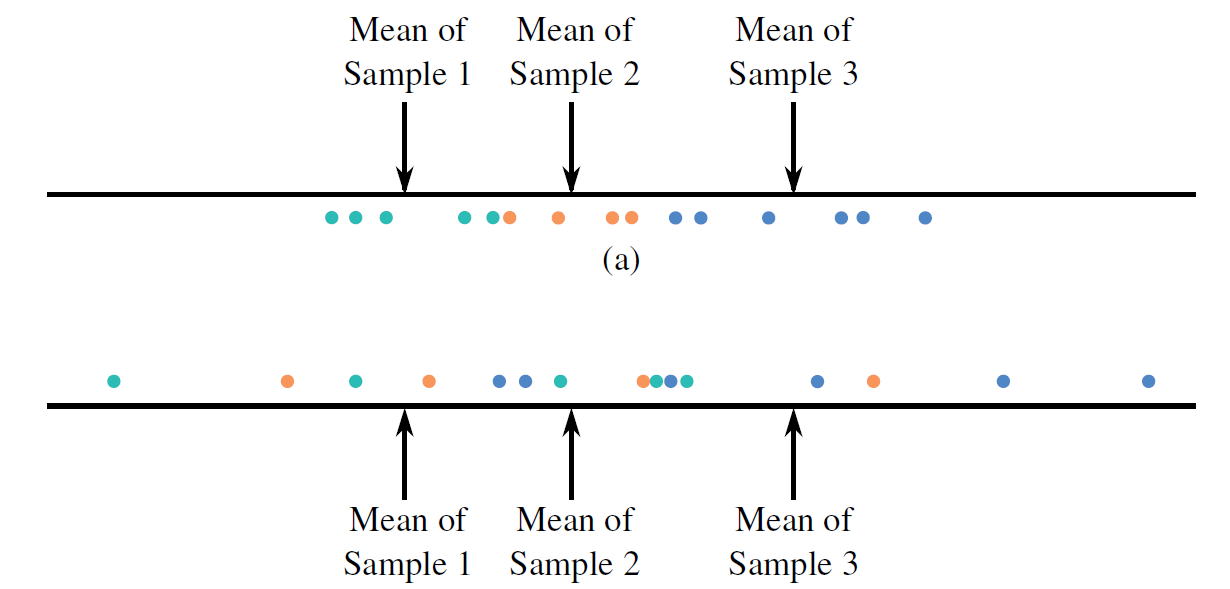

***Analysis of Variance* comes from the idea of analyzing the variability of the data to get an idea on how much can be assigned to differences in means $\mu$'s, and how much can be assigned to variability in sample populations. If the difference between the sample means can be explained by within sample variability, there is not enough evidence to reject the null hypothesis.**

### Assumptions for ANOVA
1. Each population is distributed normally
2. The *k* normal distributions have identical standard deviations, $\sigma_1 = ... = \sigma_k$, In practice this is not always the case. The book related to this notebook recommends to use ANOVA if the largest of the standard deviations is at most twice the smalles one.
3. The observations are independent of each other

### Definition

- Treatment sum of squares (SSTr); a measure of disparity among the sample means $$\text{SSTr} = n_1(\bar{x_1} - \bar{x})^2 + ... + n_k(\bar{x_k} - \bar{x})^2$$
- Error sum of squares (SSE); a measure of variation within the $k$ samples: $$\text{SSE} = (n_1-1)s_1^2 + ... + (n_k-1)s_k^2$$
- Each sum of squares has an associated degrees of freedom (df): $$\text{treatment df} = k-1$$ $$\text{error df} = N-k$$
- Now we can calculate the means of the sum of squares: $$\text{MSTr} = \frac{\text{SSTr}}{k-1}$$ $$\text{MSE} = \frac{\text{SSE}}{N-k}$$
- When $H_0$ is true (and $\mu_1 = ... = \mu_k$), we expect: $$\mu_{MSTr} = \mu_{MSE}$$
However, when $H_0$ is false, we expect $$\mu_{MSTr} > \mu_{MSE}$$
and the greater the difference among the means, the larger $\mu_{MSTr}$ will be relative to $\mu_{MSE}$
- Test statistic: $$F = \frac{\text{MSTr}}{\text{MSE}}$$ where the shape of the F-distribution depends on the number of observations and degrees of freedom
- Practical: the total sum of squares (SSTo) is given by: $$\sum_{N}(x-\bar{x})^2$$ And the relation between the three sums of squares is $$\text{SSTo} = \text{SSTr} + \text{SSE}$$

### Example: Change in Body Fat Mass (kg)

In [11]:
PP = pd.Series([0.1, 0.6, 2.2, 0.7, -2.0, 0.7, 0.0, -2.6, -1.4, 1.5, 2.8, 0.3, -1.0, -1.0], name='Placebo + Placebo')
PS = pd.Series([-0.1, 0.2, 0.0, -0.4, -0.9, -1.1, 1.2, 0.1, 0.7, -2.0, -0.9, -3.0, 1.0, 1.2], name = 'Placebo + Steroid')
GP = pd.Series([-1.6, -0.4, 0.4, -2.0, -3.4, -2.8, -2.2, -1.8, -3.3, -2.1, -3.6, -0.4, -3.1], name= 'Growht Hormone + Placebo')
GS = pd.Series([-3.1, -3.2, -2.0, -2.0, -3.3, -0.5, -4.5, -0.7, -1.8, -2.3, -1.3, -1.0, -5.6, -2.9, -1.6, -0.2], name= 'Growth Hormone + Steroid')

df = pd.concat([PP, PS, GP, GS], axis=1)
display(df)

,Placebo + Placebo,Placebo + Steroid,Growht Hormone + Placebo,Growth Hormone + Steroid
0,0.1,-0.1,-1.6,-3.1
1,0.6,0.2,-0.4,-3.2
2,2.2,0.0,0.4,-2.0
3,0.7,-0.4,-2.0,-2.0
4,-2.0,-0.9,-3.4,-3.3
5,0.7,-1.1,-2.8,-0.5
6,0.0,1.2,-2.2,-4.5
7,-2.6,0.1,-1.8,-0.7
8,-1.4,0.7,-3.3,-1.8
9,1.5,-2.0,-2.1,-2.3


In [13]:
count = df.count()
mean = df.mean()
std = df.std()
var = df.var()

print('Count:\n', count)
print('Mean:\n', mean)
print('Standard Deviation:\n', std)
print('Variance:\n', var)

Count:
 Placebo + Placebo           14
Placebo + Steroid           14
Growht Hormone + Placebo    13
Growth Hormone + Steroid    16
dtype: int64
Mean:
 Placebo + Placebo           0.064286
Placebo + Steroid          -0.285714
Growht Hormone + Placebo   -2.023077
Growth Hormone + Steroid   -2.250000
dtype: float64
Standard Deviation:
 Placebo + Placebo           1.545020
Placebo + Steroid           1.217726
Growht Hormone + Placebo    1.264353
Growth Hormone + Steroid    1.467878
dtype: float64
Variance:
 Placebo + Placebo           2.387088
Placebo + Steroid           1.482857
Growht Hormone + Placebo    1.598590
Growth Hormone + Steroid    2.154667
dtype: float64


In [21]:
SSTr = ((mean - mean.mean())**2 * count).sum()
MSTr = SSTr / (4-1)
SSE = sum((count-1)*std**2)
MSE = SSE / (count.sum()-4)

F = MSTr / MSE

print('F:\n', F)
print("Following Appendix Table 6, this gives us a p-value < 0.001")
print("Therefore, we reject the null hypothesis. There is a significant difference between the means of the four groups.")

F:
 10.48104299605445
Following Appendix Table 6, this gives us a p-value < 0.001
Therefore, we reject the null hypothesis. There is a significant difference between the means of the four groups.


### The Tukey-Kramer Multiple comparison Procedure

After performing the ANOVA, we can use the Tukey-Krame procedure to find what groups have different means. When there are *k* populations (or treatments) being compared, $\frac{k(k-1)}{2}$ confidence intervals must be computed: $$\text{For $\mu_i - \mu_j$}: (\bar{x_i} - \bar{x_j}) \pm q \sqrt{\frac{\text{MSE}}{2}(\frac{1}{n_i}+\frac{1}{n_j})}$$ Two means differ significantly if the corresponding interval does not include zero (no positive and negative value in interval)